# RECOV.AI - Exploratory Data Analysis

## Analyzing Training Data for Debt Recovery Prediction Model

**Objective:** Understand data quality, distributions, correlations, and patterns before model training.

**Key Focus:** Relationship between **shipping data** and **payment outcome**

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load training data
try:
    df = pd.read_csv('../../backend/data/training_data.csv')
except:
    df = pd.read_csv('../backend/data/training_data.csv')

# Display first 10 rows
df.head(10)

,account_id,company_name,industry,region,amount,days_overdue,payment_history_score,shipment_volume_change_30d,email_opened,dispute_flag,outcome
0,ACC0,Company_0,Construction,West,10078,72,0.28,-0.42,0,1,0
1,ACC1,Company_1,Medical,West,26003,68,0.31,-0.38,0,0,0
2,ACC2,Company_2,Textile,West,7090,75,0.22,-0.45,0,0,0
3,ACC3,Company_3,Medical,West,39850,12,0.85,0.35,0,0,1
4,ACC4,Company_4,Medical,West,2925,8,0.91,0.42,1,0,1
5,ACC5,Company_5,Tech,North,19440,78,0.19,-0.41,1,0,0
6,ACC6,Company_6,Textile,West,40685,15,0.88,0.38,1,0,1
7,ACC7,Company_7,Textile,North,27015,22,0.79,0.29,0,0,1
8,ACC8,Company_8,Textile,West,34320,18,0.92,0.33,1,0,1
9,ACC9,Company_9,Medical,East,26291,65,0.25,-0.44,1,0,0


In [3]:
# Summary statistics
df.describe()

,amount,days_overdue,payment_history_score,shipment_volume_change_30d,email_opened,dispute_flag,outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000
mean,26408.161000,52.258000,0.524760,-0.077820,0.528000,0.1020,0.411000
std,13830.874415,31.868779,0.300871,0.391231,0.499465,0.3028,0.492261
min,1125.000000,4.000000,0.160000,-0.490000,0.000000,0.0000,0.000000
25%,14160.750000,16.000000,0.270000,-0.420000,0.000000,0.0000,0.000000
50%,27251.000000,73.000000,0.330000,-0.350000,1.000000,0.0000,0.000000
75%,37856.250000,80.000000,0.870000,0.380000,1.000000,0.0000,1.000000
max,49998.000000,89.000000,0.970000,0.490000,1.000000,1.0000,1.000000


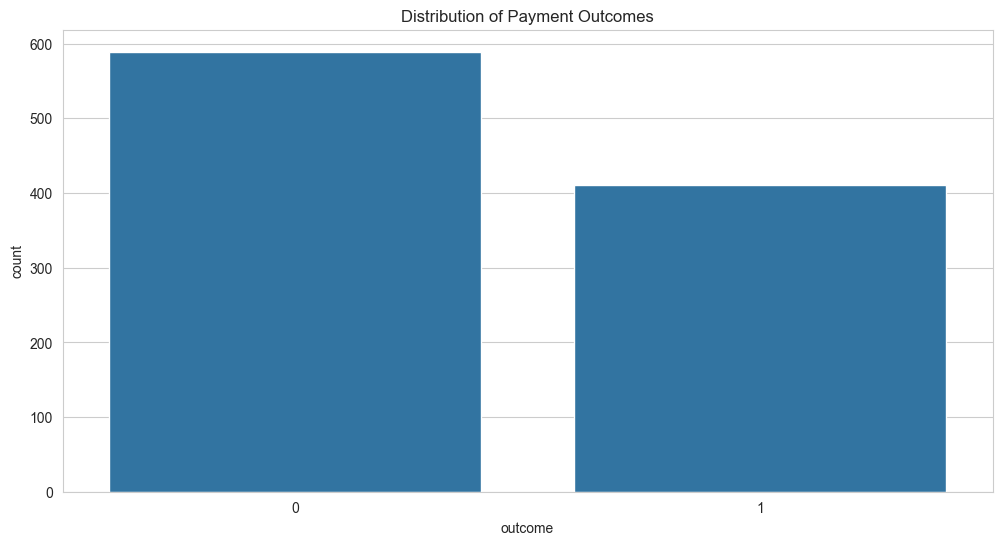

In [4]:
# Outcome Distribution
sns.countplot(x='outcome', data=df)
plt.title('Distribution of Payment Outcomes')
plt.show()

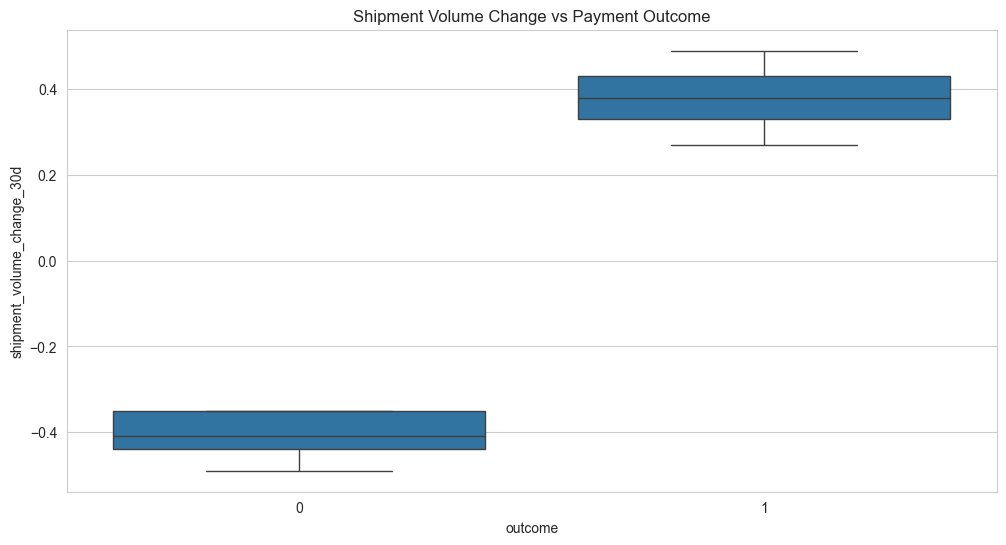

In [5]:
# KEY ANALYSIS: Shipping vs Outcome
sns.boxplot(x='outcome', y='shipment_volume_change_30d', data=df)
plt.title('Shipment Volume Change vs Payment Outcome')
plt.show()

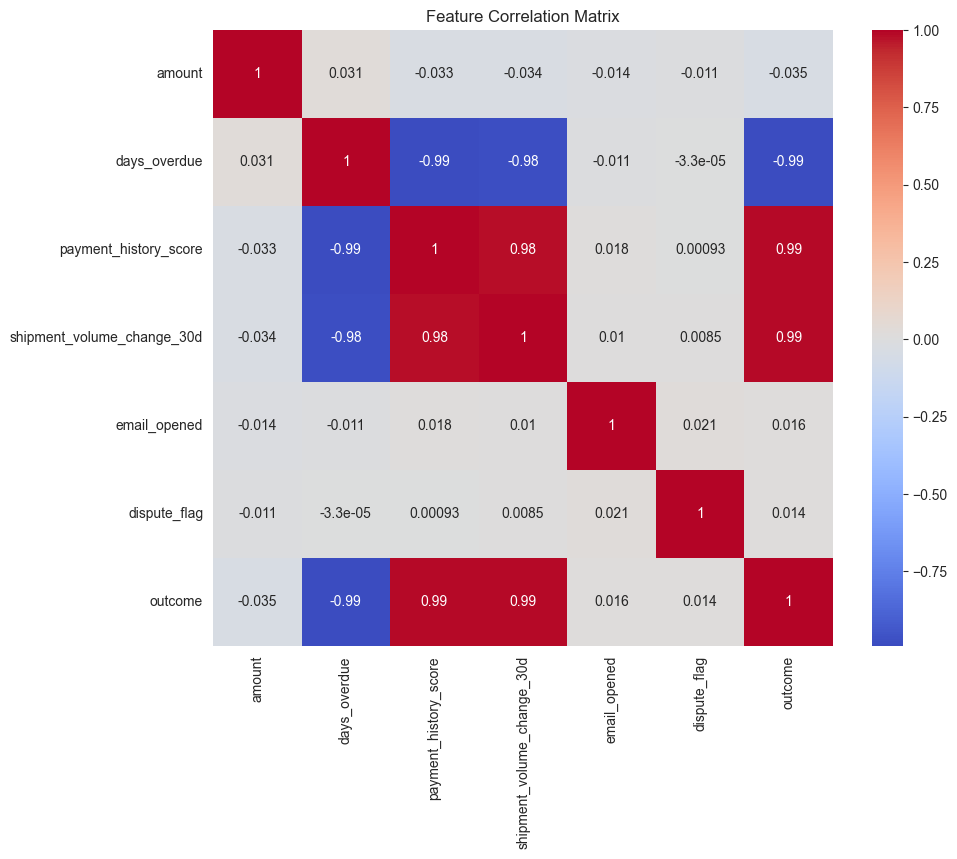

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10,8))

# FIX: Add numeric_only=True to ignore text columns like 'account_id'
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

plt.title('Feature Correlation Matrix')
plt.show()